# <font color="purple">SNR Result</font>

**Experiment of Residual Networks**

In [1]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans
folder_name = "./adversarial_examples_parseval_net/src/logs/saved_models/"
folder_name = ""

     |████████████████████████████████| 163kB 22.5MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 


In [37]:
import tensorflow as tf
from cleverhans.future.tf2.attacks import fast_gradient_method
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import  KFold
import gzip
import pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")

print("\nTensorflow Version: " + tf.__version__)


# defined utility functions
#from preprocessing import preprocessing_data

from _utility import lrate, get_adversarial_examples, print_test
#from wresnet import WideResidualNetwork
#from parsevalnet import ParsevalNetwork
#import pandas as pd
 


Tensorflow Version: 2.4.0


In [5]:
!cp drive/MyDrive/ARAS/*  models/

In [11]:
!cp drive/MyDrive/adversarial_examples_parseval_net/data.pz models/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
epsilon_list = [i/1000 for i in range(0,40)]

In [ ]:
epsilon_list

In [14]:
!pip install hickle
import hickle as hkl

     |████████████████████████████████| 51kB 6.4MB/s 


In [17]:
data = hkl.load("data.hkl")
X_train, X_test, Y_train, y_test = data['xtrain'], data['xtest'], data['ytrain'], data['ytest']

In [32]:

BS = 64
init = (32, 32,1)
opt = SGD(lr=0.1, momentum=0.9)

In [ ]:

parseval = ParsevalNetwork(init, 0.0001, 0.9, nb_classes=4, N=2, k=1, dropout=0.0)
resnet = WideResidualNetwork(init, 0.0001, 0.9, nb_classes=4, N=2, k=1, dropout=0.0)
parseval_model = parseval.create_wide_residual_network()
parseval_model_da = parseval.create_wide_residual_network()
resnet_model = resnet.create_wide_residual_network()
resnet_model_da = resnet.create_wide_residual_network()

In [ ]:
def evaluation_result(frame, model, model_da, index):
    for i, epsilon in enumerate(epsilon_list):
        x_adv  =  get_adversarial_examples(model,X_test, y_test, epsilon)
        SNR = 20*np.log10(np.linalg.norm(X_test)/np.linalg.norm(X_test-x_adv))
        test = model.evaluate(x_adv, y_test, verbose = 0.0)
        test_da = model_da.evaluate(x_adv, y_test, verbose = 0.0)
        row = {"acc":test[1], "acc_da": test_da[1],"SNR":SNR}
        frame = frame.append(row,  ignore_index=True)
    return frame

In [ ]:
df_parseval_1 = pd.DataFrame()
df_parseval_2 = pd.DataFrame()
df_parseval_3 = pd.DataFrame()
df_parseval_4 = pd.DataFrame()
df_parseval_5 = pd.DataFrame()
df_parseval_6 = pd.DataFrame()
df_parseval_7 = pd.DataFrame()
df_parseval_8 = pd.DataFrame()
df_parseval_9 = pd.DataFrame()
df_parseval_0 = pd.DataFrame()


In [ ]:
list_df = []
list_df.append(df_parseval_0)
list_df.append(df_parseval_1)
list_df.append(df_parseval_2)
list_df.append(df_parseval_3)
list_df.append(df_parseval_4)
list_df.append(df_parseval_5)
list_df.append(df_parseval_6)
list_df.append(df_parseval_7)
list_df.append(df_parseval_8)
list_df.append(df_parseval_9)

In [ ]:
column_name = "test_"
column_name_da = "test_da_"

for i in range(10):
    model_name = "Parseval_"+str(i)+".h5"
    model_name_da = "Parseval_da_"+str(i)+".h5"
    parseval_model.load_weights(model_name)
    parseval_model_da.load_weights(model_name_da)
    parseval_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    parseval_model_da.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    list_df[i] = evaluation_result(list_df[i], parseval_model, parseval_model_da, i)

In [ ]:
mean_acc = (list_df[0]["acc"]+list_df[1]["acc"]+list_df[2]["acc"]+list_df[3]["acc"]+list_df[4]["acc"]+list_df[5]["acc"]+list_df[6]["acc"]+list_df[7]["acc"]+list_df[8]["acc"]+list_df[9]["acc"])/10

In [ ]:
mean_acc_da = (list_df[0]["acc_da"]+list_df[1]["acc_da"]+list_df[2]["acc_da"]+list_df[3]["acc_da"]+list_df[4]["acc_da"]+list_df[5]["acc_da"]+list_df[6]["acc_da"]+list_df[7]["acc_da"]+list_df[8]["acc_da"]+list_df[9]["acc_da"])/10

In [ ]:
df_resnet_1 = pd.DataFrame()
df_resnet_2 = pd.DataFrame()
df_resnet_3 = pd.DataFrame()
df_resnet_4 = pd.DataFrame()
df_resnet_5 = pd.DataFrame()
df_resnet_6 = pd.DataFrame()
df_resnet_7 = pd.DataFrame()
df_resnet_8 = pd.DataFrame()
df_resnet_9 = pd.DataFrame()
df_resnet_0 = pd.DataFrame()
list_df_r = []
list_df_r.append(df_resnet_0)
list_df_r.append(df_resnet_1)
list_df_r.append(df_resnet_2)
list_df_r.append(df_resnet_3)
list_df_r.append(df_resnet_4)
list_df_r.append(df_resnet_5)
list_df_r.append(df_resnet_6)
list_df_r.append(df_resnet_7)
list_df_r.append(df_resnet_8)
list_df_r.append(df_resnet_9)

In [ ]:
column_name = "test_"
column_name_da = "test_da_"

for i in range(10):
    model_name = "ResNet_"+str(i)+".h5"
    model_name_da = "ResNet_da_"+str(i)+".h5"
    resnet_model.load_weights(model_name)
    resnet_model_da.load_weights(model_name_da)
    resnet_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    resnet_model_da.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    list_df_r[i] = evaluation_result(list_df_r[i], resnet_model, resnet_model_da, i)


In [ ]:
list_df[9]

In [ ]:
mean_acc_r = (list_df_r[0]["acc"]+list_df_r[1]["acc"]+list_df_r[2]["acc"]+list_df_r[3]["acc"]+list_df_r[4]["acc"]+list_df_r[5]["acc"]+list_df_r[6]["acc"]+list_df_r[7]["acc"]+list_df_r[8]["acc"]+list_df_r[9]["acc"])/10

In [ ]:
mean_acc_da_r = (list_df_r[0]["acc_da"]+list_df_r[1]["acc_da"]+list_df_r[2]["acc_da"]+list_df_r[3]["acc_da"]+list_df_r[4]["acc_da"]+list_df_r[5]["acc_da"]+list_df_r[6]["acc_da"]+list_df_r[7]["acc_da"]+list_df_r[8]["acc_da"]+list_df_r[9]["acc_da"])/10

In [ ]:
mean_acc_r[0]

0.6956369936466217

In [ ]:
len(mean_acc_da_r)

40

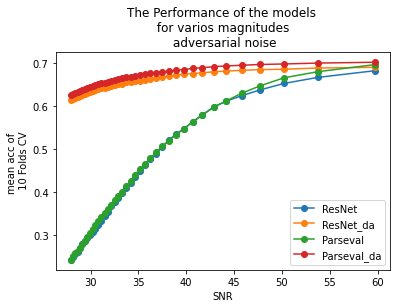

In [ ]:
import matplotlib.pyplot as plt

legend = ["ResNet", "ResNet_da", "Parseval", "Parseval_da"]
plt.plot(list_df_r[0]["SNR"], mean_acc_r, 'o-')
plt.plot(list_df_r[0]["SNR"], mean_acc_da_r, 'o-')

plt.plot(list_df_r[0]["SNR"], mean_acc, 'o-')
plt.plot(list_df_r[0]["SNR"], mean_acc_da, 'o-')

plt.title("The Performance of the models \n for varios magnitudes \n adversarial noise")
plt.ylabel('mean acc of \n 10 Folds CV')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()

In [ ]:
import json
for i in range(len(epsilon_list)):
    with open("result_ResNet.json", mode='a', encoding='utf-8') as feedsjson:
        data = {"SNR":list_df_r[0]["SNR"][i], "mean_ResNet":mean_acc_r[i],"mean_ResNet_da":mean_acc_da_r[i], "mean_Parseval":mean_acc[i],"mean_Parseval_da":mean_acc_da[i]}
        feedsjson.write(json.dumps(data, ensure_ascii=False, indent=4))
        feedsjson.close()

In [54]:
df_sgd_1 = pd.DataFrame()
df_sgd_2 = pd.DataFrame()
df_sgd_3 = pd.DataFrame()
df_sgd_4 = pd.DataFrame()
df_sgd_5 = pd.DataFrame()
df_sgd_6 = pd.DataFrame()
df_sgd_7 = pd.DataFrame()
df_sgd_8 = pd.DataFrame()
df_sgd_9 = pd.DataFrame()
df_sgd_0 = pd.DataFrame()
list_df_c = []
list_df_c.append(df_sgd_0)
list_df_c.append(df_sgd_1)
list_df_c.append(df_sgd_2)
list_df_c.append(df_sgd_3)
list_df_c.append(df_sgd_4)
list_df_c.append(df_sgd_5)
list_df_c.append(df_sgd_6)
list_df_c.append(df_sgd_7)
list_df_c.append(df_sgd_8)
list_df_c.append(df_sgd_9)

In [24]:
from tensorflow.data import Dataset
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D, Dense, Dropout, MaxPool1D, Flatten, AveragePooling1D, BatchNormalization
from tensorflow.keras import Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
import warnings
from constraint import tight_frame

warnings.filterwarnings("ignore")

def model_parseval(weight_decay):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(32, 32, 1),kernel_regularizer=l2(weight_decay),kernel_constraint=tight_frame(0.001),kernel_initializer='Orthogonal'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=l2(weight_decay),kernel_initializer='Orthogonal',kernel_constraint=tight_frame(0.001)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer='Orthogonal',kernel_regularizer=l2(weight_decay),kernel_constraint=tight_frame(0.001)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer='Orthogonal', kernel_regularizer=l2(weight_decay),kernel_constraint=tight_frame(0.001)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(4, activation='softmax',kernel_regularizer=l2(weight_decay)))
  return model

In [25]:
from tensorflow.data import Dataset
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D, Dense, Dropout, MaxPool1D, Flatten, AveragePooling1D, BatchNormalization
from tensorflow.keras import Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
import warnings
from constraint import tight_frame
from convexity_constraint import convex_add
warnings.filterwarnings("ignore")

def basemodel(weight_decay):
  #2 hidden layers
    model_input = Input(shape=(32,32,1, ))
    model = Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay),activation='relu', )(model_input)
    model = Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Flatten()(model)
    model = Dense(4, kernel_regularizer=l2(weight_decay),activation='softmax')(model)
    model = Model(inputs=model_input, outputs=model)
    return model


def model_2(weight_decay):
    model_input = Input(shape=(32,32,1, ))
    model = Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay),activation='relu', )(model_input)
    model = Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Conv2D(128, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Flatten()(model)
    model = Dense(4, kernel_regularizer=l2(weight_decay),activation='softmax')(model)
    model = Model(inputs=model_input, outputs=model)
    return model


def model_3(weight_decay):
  # 4 hidden layers
    model_input = Input(shape=(32,32,1, ))
    model = Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay),activation='relu', )(model_input)
    model = Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Conv2D(128, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Conv2D(256, kernel_size=(3, 3), kernel_regularizer=l2(weight_decay), activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = BatchNormalization()(model)
    model = Flatten()(model)
    model = Dense(4, kernel_regularizer=l2(weight_decay),activation='softmax')(model)
    model = Model(inputs=model_input, outputs=model)
    return model

In [55]:
def evaluation_result_fully_connected(frame, sgd, sgd_wd,sgd_wd_da,parseval, index):
    test = sgd.evaluate(X_test, y_test, verbose = 0.0)
    test_wd = sgd_wd.evaluate(X_test, y_test, verbose = 0.0)
    test_wd_da = sgd_wd_da.evaluate(X_test, y_test, verbose = 0.0)
    test_parseval = parseval.evaluate(X_test, y_test, verbose = 0.0)
    row = {"acc_sgd":test[1], "acc_sgd_wd": test_wd[1],"acc_sgd_wd_da":test_wd_da[1],"acc_parseval":test_parseval[1], "SNR":100}
    frame = frame.append(row,  ignore_index=True)
    for i, epsilon in enumerate(epsilon_list):
      x_adv  =  get_adversarial_examples(sgd,X_test, y_test, epsilon)
      SNR = 20*np.log10(np.linalg.norm(X_test)/np.linalg.norm(X_test-x_adv))
      test = sgd.evaluate(x_adv, y_test, verbose = 0.0)
      test_wd = sgd_wd.evaluate(x_adv, y_test, verbose = 0.0)
      test_wd_da = sgd_wd_da.evaluate(x_adv, y_test, verbose = 0.0)
      test_parseval = parseval.evaluate(x_adv, y_test, verbose = 0.0)
      row = {"acc_sgd":test[1], "acc_sgd_wd": test_wd[1],"acc_sgd_wd_da":test_wd_da[1],"acc_parseval":test_parseval[1], "SNR":SNR}
      frame = frame.append(row,  ignore_index=True)

    return frame

In [56]:
for i in range(10):
    name_sgd = "models/sgd_"+str(i)+".h5"
    name_sgd_wd = "models/sgd_wd_"+str(i)+".h5"
    name_sgd_wd_da = "models/conv_wd_da_"+str(i)+".h5"
    name_parseval = "models/Parseval_"+str(i)+".h5"
    sgd = model_3(0)
    sgd_wd = model_3(0.0001)
    sgd_wd_da = model_3(0.0001)
    parseval = model_parseval(0)
    sgd.load_weights(name_sgd)
    sgd_wd.load_weights(name_sgd_wd)
    sgd_wd_da.load_weights(name_sgd_wd_da)
    parseval.load_weights(name_parseval)
    sgd.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    sgd_wd.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    sgd_wd_da.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    parseval.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])
    list_df_c[i] = evaluation_result_fully_connected(list_df_c[i],sgd, sgd_wd, sgd_wd_da, parseval, i)

In [57]:
mean_acc_sgd = (list_df_c[0]["acc_sgd"]+list_df_c[1]["acc_sgd"]+list_df_c[2]["acc_sgd"]+list_df_c[3]["acc_sgd"]+list_df_c[4]["acc_sgd"]+list_df_c[5]["acc_sgd"]+list_df_c[6]["acc_sgd"]+list_df_c[7]["acc_sgd"]+list_df_c[8]["acc_sgd"]+list_df_c[9]["acc_sgd"])/10

In [58]:
mean_acc_sgd_wd = (list_df_c[0]["acc_sgd_wd"]+list_df_c[1]["acc_sgd_wd"]+list_df_c[2]["acc_sgd_wd"]+list_df_c[3]["acc_sgd_wd"]+list_df_c[4]["acc_sgd_wd"]+list_df_c[5]["acc_sgd_wd"]+list_df_c[6]["acc_sgd_wd"]+list_df_c[7]["acc_sgd_wd"]+list_df_c[8]["acc_sgd_wd"]+list_df_c[9]["acc_sgd_wd"])/10

In [59]:
mean_acc_sgd_wd_da = (list_df_c[0]["acc_sgd_wd_da"]+list_df_c[1]["acc_sgd_wd_da"]+list_df_c[2]["acc_sgd_wd_da"]+list_df_c[3]["acc_sgd_wd_da"]+list_df_c[4]["acc_sgd_wd_da"]+list_df_c[5]["acc_sgd_wd_da"]+list_df_c[6]["acc_sgd_wd_da"]+list_df_c[7]["acc_sgd_wd_da"]+list_df_c[8]["acc_sgd_wd_da"]+list_df_c[9]["acc_sgd_wd_da"])/10

In [61]:
mean_acc_parseval = (list_df_c[0]["acc_parseval"]+list_df_c[1]["acc_parseval"]+list_df_c[2]["acc_parseval"]+list_df_c[3]["acc_parseval"]+list_df_c[4]["acc_parseval"]+list_df_c[5]["acc_parseval"]+list_df_c[6]["acc_parseval"]+list_df_c[7]["acc_parseval"]+list_df_c[8]["acc_parseval"]+list_df_c[9]["acc_parseval"])/10

In [66]:
list_df_c[0]["SNR"][1] =100

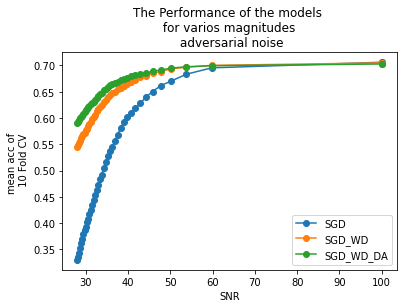

In [70]:
import matplotlib.pyplot as plt

legend = ["SGD", "SGD_WD", "SGD_WD_DA"]
plt.plot(list_df_c[0]["SNR"], mean_acc_sgd, 'o-')
plt.plot(list_df_c[0]["SNR"], mean_acc_sgd_wd, 'o-')

plt.plot(list_df_c[0]["SNR"], mean_acc_sgd_wd_da, 'o-')


plt.title("The Performance of the models \n for varios magnitudes \n adversarial noise")
plt.ylabel('mean acc of \n 10 Fold CV')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()

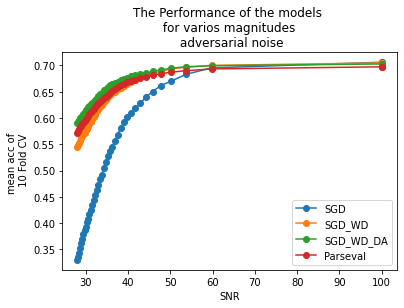

In [71]:
import matplotlib.pyplot as plt

legend = ["SGD", "SGD_WD", "SGD_WD_DA", "Parseval"]
plt.plot(list_df_c[0]["SNR"], mean_acc_sgd, 'o-')
plt.plot(list_df_c[0]["SNR"], mean_acc_sgd_wd, 'o-')

plt.plot(list_df_c[0]["SNR"], mean_acc_sgd_wd_da, 'o-')
plt.plot(list_df_c[0]["SNR"], mean_acc_parseval, 'o-')

plt.title("The Performance of the models \n for varios magnitudes \n adversarial noise")
plt.ylabel('mean acc of \n 10 Fold CV')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()

In [63]:
import json
for i in range(len(epsilon_list)):
    with open("result_CNN.json", mode='a', encoding='utf-8') as feedsjson:
        data = {"SNR":list_df_c[0]["SNR"][i], "mean_acc_sgd":mean_acc_sgd[i],"mean_acc_sgd_wd":mean_acc_sgd_wd[i], "mean_acc_sgd_wd_da":mean_acc_sgd_wd_da[i],"mean_acc_parseval":mean_acc_parseval[i]}
        feedsjson.write(json.dumps(data, ensure_ascii=False, indent=4))
        feedsjson.close()

In [72]:
!cp result_CNN.json drive/MyDrive/ARAS/

## Signal to Noise Ratio Visualization

## WhiteBox Attacker for CNN

In [1]:
import json
import pandas as pd
base_path = "/Users/sefika/adversarial_examples_parseval_net/src/logs/SNR_Experiments/result_CNN.json"

SNR = []
mean_acc_sgd = []
mean_acc_sgd_wd = []
mean_acc_sgd_wd_da = []
mean_acc_parseval = []


f = open(base_path, "r")
data = f.read()

results = data.replace("{","").split("}")

for result in results:
    data = result.split(",")
    if len(data) != 1:
        SNR.append(round(float(data[0].split(":")[-1]),2))
        mean_acc_sgd.append(round(float(data[1].split(":")[-1]),2))
        mean_acc_sgd_wd.append(round(float(data[2].split(":")[-1]),2))
        mean_acc_sgd_wd_da.append(round(float(data[3].split(":")[-1]),2))
        mean_acc_parseval.append(round(float(data[4].split(":")[-1]), 2))

In [2]:
list_data = [mean_acc_sgd, mean_acc_sgd_wd, mean_acc_sgd_wd_da,mean_acc_parseval]


cnn_results_df = pd.DataFrame()
# cnn_results_df["SNR"] = SNR
cnn_results_df["CNN_SGD"] = mean_acc_sgd
cnn_results_df["CNN_SGD_WD"] = mean_acc_sgd_wd
cnn_results_df["CNN_SGD_WD_AD"] = mean_acc_sgd_wd_da
cnn_results_df["Parseval"] = mean_acc_parseval

In [5]:
import plotly.express as px
df = px.data.tips()
fig = px.box(cnn_results_df)
fig.update_layout(
    title="The model accuracies against adversarial attacks between 28 and infinity SNR values.",
    xaxis_title="Model Names",
    yaxis_title="Accuracy"
)
fig.show()

## WhiteBox Attacker for ResNet

In [6]:
import json

base_path = "/Users/sefika/adversarial_examples_parseval_net/src/logs/SNR_Experiments/result_ResNet.json"

SNR = []
mean_ResNet = []
mean_ResNet_da = []
mean_Parseval = []
mean_Parseval_da = []
f = open(base_path, "r")
data = f.read()

results = data.replace("{","").split("}")

for result in results:
    data = result.split(",")
    if len(data) != 1:
        SNR.append(round(float(data[0].split(":")[-1]),3))
        mean_ResNet.append(round(float(data[1].split(":")[-1]),3))
        mean_ResNet_da.append(round(float(data[2].split(":")[-1]),3))
        mean_Parseval.append(round(float(data[3].split(":")[-1]),3))
        mean_Parseval_da.append(round(float(data[4].split(":")[-1]), 3))

In [7]:
list_data = [mean_acc_sgd, mean_acc_sgd_wd, mean_acc_sgd_wd_da,mean_acc_parseval]


resnet_results_df = pd.DataFrame()
# cnn_results_df["SNR"] = SNR
resnet_results_df["ResNet"] = mean_ResNet
resnet_results_df["ResNet_AD"] = mean_ResNet_da
resnet_results_df["Parseval"] = mean_Parseval
resnet_results_df["Parseval_AD"] = mean_Parseval_da

In [8]:
import plotly.express as px
df = px.data.tips()
fig = px.box(resnet_results_df)
fig.update_layout(
    title="The model accuracies against adversarial attacks between 28 and infinity SNR values.",
    xaxis_title="Model Names",
    yaxis_title="Accuracy"
)
fig.show()

# Random Noise Attacks

## CNN Models

## ResNet and Parseval Networks